In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
%cd Data/

C:\Users\Anas\Walmart Sales\Data


In [3]:
features = pd.read_csv('features.csv')
data = pd.read_csv("train.csv")

In [4]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
features.dtypes 

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [7]:
features.shape

(8190, 12)

In [8]:
data.shape

(421570, 5)

In [9]:
data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


# My goal is to predict the weekly sales of that department


In [10]:
len(data['Dept'].unique())

81

In [11]:
# mask = ((data['Dept']== 1) & (data['IsHoliday'] == True))


In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
# data.set_index('Date',inplace= True)
# data.head(15)

In [14]:
sales_eachdeptr = (data.groupby(by=['Date','Dept'])
                  .Weekly_Sales
                  .first()
                  .unstack())
sales_eachdeptr.shape

(143, 81)

In [15]:
sales_eachdeptr.head()

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,50605.27,13740.12,39954.04,32229.38,5749.03,21084.08,40129.01,16930.99,30721.50,...,76419.47,62424.14,139884.94,64494.87,56655.39,106690.06,29295.96,32153.04,10891.37,0.02
2010-02-12,46039.49,44682.74,10887.84,35351.21,29620.81,9135.00,18310.31,37334.83,16562.49,31494.77,...,79455.64,66937.00,143081.42,70202.02,62329.48,111390.36,32120.35,33874.47,16309.73,0.01
2010-02-19,41595.55,47928.89,11523.47,36826.95,26468.27,6060.26,19985.20,38717.60,15880.85,29634.13,...,76091.36,63011.44,135066.75,62581.64,72212.32,107952.07,29022.90,31585.78,12087.95,8.98
2010-02-26,19403.54,44292.87,11135.17,34660.16,24101.89,5244.56,17224.22,35318.20,15175.52,27921.96,...,71718.48,57335.17,125048.08,57630.02,55501.07,103652.58,27284.02,28457.31,10871.74,NaN
2010-03-05,21827.90,48397.98,12275.58,38086.19,23082.14,4221.25,19659.70,38776.09,24064.70,33299.27,...,78081.85,62755.71,132945.44,63550.08,59201.37,112807.75,29584.45,31576.47,10903.65,0.01


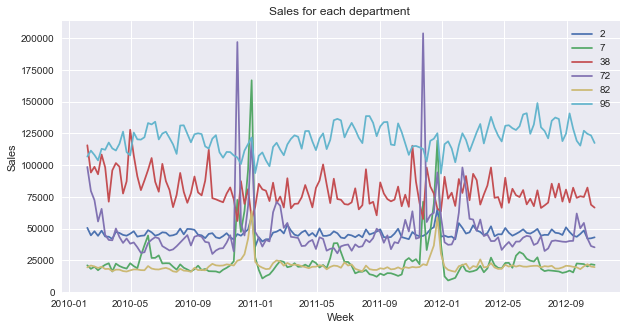

In [16]:
depts = [2 , 7 , 38 , 72 , 82 , 95]
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

for i in range(len(depts)):
    plt.plot(sales_eachdeptr[depts[i]])
    plt.legend(depts)
plt.title("Sales for each department ")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

as we see the sales for these departments increse in time of vacations


In [17]:
sales_eachdeptr.max().sort_values(ascending = False)

Dept
72    203670.47
92    194839.60
7     166697.72
95    148798.05
38    127811.89
        ...    
51       209.72
45        95.76
78        40.00
39        28.31
43         3.00
Length: 81, dtype: float64

In [18]:
sales_eachdeptr.describe()

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,94.000000
mean,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33269.803217,35207.348811,11827.770769,133.856489
std,9854.349032,3440.673222,8708.978853,2930.698313,11330.286495,3317.432691,18808.958465,2490.769188,8422.254593,3509.190495,...,8355.642884,6063.276662,16599.484707,9300.200076,6605.065020,10234.444724,5788.326194,3388.496723,2081.131442,366.383647
min,14537.370000,35819.830000,6165.730000,32497.430000,11570.270000,-139.650000,9194.610000,31061.210000,11355.870000,23058.410000,...,67584.030000,48263.590000,106205.580000,55082.400000,45989.260000,93358.910000,5265.090000,28457.310000,8283.280000,-147.000000
25%,16494.630000,44170.460000,8693.040000,34887.740000,17972.590000,3364.800000,16703.165000,34010.225000,22739.510000,28905.830000,...,76520.785000,59665.255000,124487.620000,64135.930000,59180.660000,113069.290000,30660.490000,32357.310000,10649.535000,0.020000
50%,18535.480000,45561.850000,10366.850000,36579.960000,21183.420000,4132.610000,20212.710000,35356.120000,27333.830000,30888.690000,...,81580.580000,64022.490000,132945.440000,72089.330000,62767.870000,120721.070000,32644.210000,35362.900000,11424.420000,10.760000
75%,23214.215000,47612.245000,12655.610000,38268.405000,25653.795000,5022.410000,24130.175000,37262.380000,32744.210000,32686.415000,...,88069.955000,68754.780000,145234.685000,78472.555000,66589.975000,127654.500000,36297.650000,37727.470000,12395.485000,72.500000
max,57592.120000,65615.360000,51159.170000,47893.230000,85676.090000,28497.520000,166697.720000,42663.750000,50675.720000,43718.050000,...,116538.940000,76603.530000,194839.600000,97979.960000,86052.030000,148798.050000,52101.280000,43995.150000,20732.040000,2400.000000


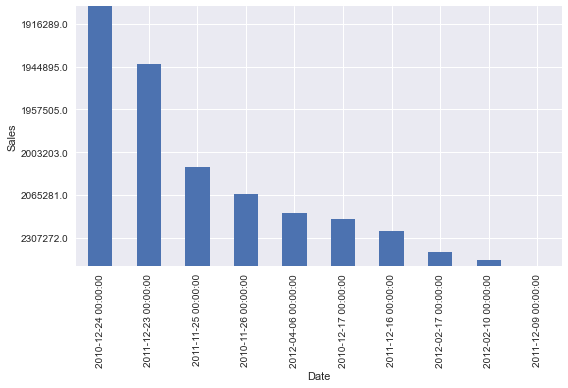

In [19]:
#get the total sales for each week 
sales_byweek = sales_eachdeptr.sum(axis= 1).sort_values(ascending=False)
top_weeks = sales_byweek.head(10)

min_height = min(top_weeks.values)
max_height = max(top_weeks.values)


ax = top_weeks.plot.bar()
plt.ylim(min_height, max_height)
ax.set_yticklabels(np.round(top_weeks.values ,0))
plt.ylabel("Sales")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


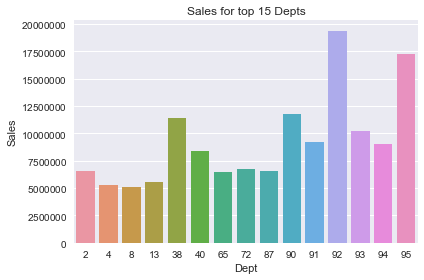

In [50]:
# Assuming 'sales_eachdeptr' is a DataFrame with sales data for each department
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
sales_bydept = sales_eachdeptr.sum(axis=0).sort_values (ascending=False)
top_Dept = sales_bydept.head(15)
sns.barplot(x =top_Dept.index ,  y = top_Dept.values , oreder= type_order )
plt.ylabel('Sales')
plt.title('Sales for top 15 Depts')
plt.show()